<a href="https://colab.research.google.com/github/tranvietphi20104051/baitapAI/blob/main/chiecnoicomdien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


RuntimeError: ignored

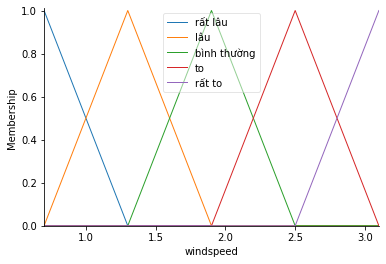

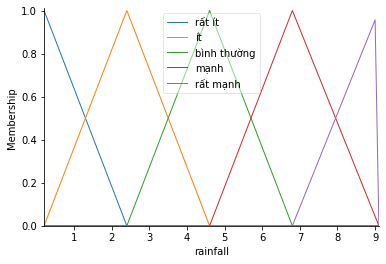

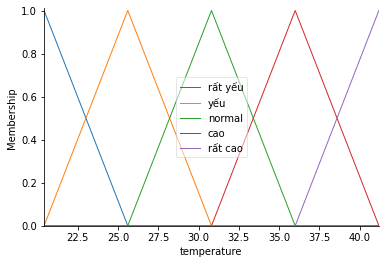

In [ ]:
from skfuzzy import control as ctrl
import numpy as np
import skfuzzy as fuzz
windspeed = ctrl.Antecedent(np.arange(0.7,3.2,0.1),'windspeed')
rainfall = ctrl.Antecedent(np.arange(0.2,9.2,0.1),'rainfall')
temperature = ctrl.Consequent(np.arange(20.4,41.3,0.2),'temperature')

windspeed['rất lâu'] = fuzz.trimf(windspeed.universe,[0.7,0.7,1.3]) 
windspeed['lâu'] = fuzz.trimf(windspeed.universe,[0.7,1.3,1.9])
windspeed['bình thường'] = fuzz.trimf(windspeed.universe,[1.3,1.9,2.5])
windspeed['to'] = fuzz.trimf(windspeed.universe,[1.9,2.5,3.1])
windspeed['rất to'] = fuzz.trimf(windspeed.universe,[2.5,3.1,3.1]) 
windspeed.view()

rainfall['rất ít'] = fuzz.trimf(rainfall.universe,[0.2,0.2,2.4])
rainfall['ít'] = fuzz.trimf(rainfall.universe,[0.2,2.4,4.6])
rainfall['bình thường'] = fuzz.trimf(rainfall.universe,[2.4,4.6,6.8])
rainfall['mạnh'] = fuzz.trimf(rainfall.universe,[4.6,6.8,9.1])
rainfall['rất mạnh'] = fuzz.trimf(rainfall.universe,[6.8,9.1,9.1])
rainfall.view()

temperature['rất yếu'] = fuzz.trimf(temperature.universe,[20.4,20.4,25.6])
temperature['yếu'] = fuzz.trimf(temperature.universe,[20.4,25.6,30.8])
temperature['normal'] = fuzz.trimf(temperature.universe,[25.6,30.8,36])
temperature['cao'] = fuzz.trimf(temperature.universe,[30.8,36,41.2])
temperature['rất cao'] = fuzz.trimf(temperature.universe,[36,41.2,41.2])
temperature.view()

rule1 = ctrl.Rule(windspeed['rất lâu'] & temperature['rất yếu'],rainfall['rất ít'])
rule2 = ctrl.Rule(windspeed['rất lâu'] & temperature['yếu'],rainfall['rất ít'])
rule3 = ctrl.Rule(windspeed['rất lâu'] & temperature['normal'],rainfall['ít'])
rule4 = ctrl.Rule(windspeed['rất lâu'] & temperature['cao'],rainfall['ít'])
rule5 = ctrl.Rule(windspeed['rất lâu'] & temperature['rất cao'],rainfall['bình thường'])

rule6 = ctrl.Rule(windspeed['lâu'] & temperature['rất yếu'],rainfall['rất ít'])
rule7 = ctrl.Rule(windspeed['lâu'] & temperature['yếu'],rainfall['rất ít'])
rule8 = ctrl.Rule(windspeed['lâu'] & temperature['normal'],rainfall['ít'])
rule9 = ctrl.Rule(windspeed['lâu'] & temperature['cao'],rainfall['bình thường'])
rule10 = ctrl.Rule(windspeed['lâu'] & temperature['rất cao'],rainfall['mạnh'])

rule11 = ctrl.Rule(windspeed['bình thường'] & temperature['rất yếu'],rainfall['ít'])
rule12 = ctrl.Rule(windspeed['bình thường'] & temperature['yếu'],rainfall['bình thường'])
rule13 = ctrl.Rule(windspeed['bình thường'] & temperature['normal'],rainfall['bình thường'])
rule14 = ctrl.Rule(windspeed['bình thường'] & temperature['cao'],rainfall['bình thường'])
rule15 = ctrl.Rule(windspeed['bình thường'] & temperature['rất cao'],rainfall['mạnh'])

rule16 = ctrl.Rule(windspeed['to'] & temperature['rất yếu'],rainfall['ít'])
rule17 = ctrl.Rule(windspeed['to'] & temperature['yếu'],rainfall['bình thường'])
rule18 = ctrl.Rule(windspeed['to'] & temperature['normal'],rainfall['mạnh'])
rule19 = ctrl.Rule(windspeed['to'] & temperature['cao'],rainfall['rất mạnh'])
rule20 = ctrl.Rule(windspeed['to'] & temperature['rất cao'],rainfall['rất mạnh'])

rule21 = ctrl.Rule(windspeed['rất to'] & temperature['rất yếu'],rainfall['bình thường'])
rule22 = ctrl.Rule(windspeed['rất to'] & temperature['yếu'],rainfall['mạnh'])
rule23 = ctrl.Rule(windspeed['rất to'] & temperature['normal'],rainfall['mạnh'])
rule24 = ctrl.Rule(windspeed['rất to'] & temperature['cao'],rainfall['rất mạnh'])
rule25 = ctrl.Rule(windspeed['rất to'] & temperature['rất cao'],rainfall['rất mạnh'])

tipping_ctrl = ctrl.ControlSystem( [rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25] )
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['windspeed'] = 1.69
tipping.input['temperature'] = 30.8
tipping.compute() 

print(tipping.output['rainfall']) 
rainfall.view(sim = tipping)

4.639999999999999


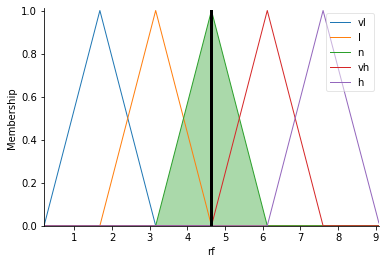

In [ ]:
from skfuzzy import control as ctrl
import numpy as np
import skfuzzy as fuzz

ws = ctrl.Antecedent(np.arange(0.7,3.2,0.6),'ws')
tp = ctrl.Antecedent(np.arange(20.4,41.2,5.2),'tp')
rf = ctrl.Consequent(np.arange(0.2,9.2,1.48),'rf')

ws['vl'] = fuzz.trimf(ws.universe,[0.7,0.7,1.3])  # theo các đỉnh hình tam giác ( do vẽ theo hình tam giác)
ws['l'] = fuzz.trimf(ws.universe,[0.7,1.3,1.9])
ws['n'] = fuzz.trimf(ws.universe,[1.3,1.9,2.5])
ws['h'] = fuzz.trimf(ws.universe,[1.9,2.5,3.1])
ws['vh'] = fuzz.trimf(ws.universe,[2.5,3.1,3.1])
#ws.view()

tp['vl'] = fuzz.trimf(tp.universe,[20.4,20.4,25.6])
tp['l'] = fuzz.trimf(tp.universe,[20.4,25.6,30.8])
tp['n'] = fuzz.trimf(tp.universe,[25.6,30.8,36])
tp['h'] = fuzz.trimf(tp.universe,[30.8,36,41.2])
tp['vh'] = fuzz.trimf(tp.universe,[36,41.2,41.2])
#tp.view()

rf['vl'] = fuzz.trimf(rf.universe,[0.2,1.68,3.16])
rf['l'] = fuzz.trimf(rf.universe,[1.68,3.16,4.64])
rf['n'] = fuzz.trimf(rf.universe,[3.16,4.64,6.12])
rf['vh'] = fuzz.trimf(rf.universe,[4.64,6.12,7.6])
rf['h'] = fuzz.trimf(rf.universe,[6.12,7.6,9.1])
#rf.view()

rule1 = ctrl.Rule(ws['vl'] & tp['vl'],rf['vl'])
rule2 = ctrl.Rule(ws['vl'] & tp['l'],rf['vl'])
rule3 = ctrl.Rule(ws['vl'] & tp['n'],rf['l'])
rule4 = ctrl.Rule(ws['vl'] & tp['h'],rf['l'])
rule5 = ctrl.Rule(ws['vl'] & tp['vh'],rf['n'])

rule6 = ctrl.Rule(ws['l'] & tp['vl'],rf['vl'])
rule7 = ctrl.Rule(ws['l'] & tp['l'],rf['vl'])
rule8 = ctrl.Rule(ws['l'] & tp['n'],rf['l'])
rule9 = ctrl.Rule(ws['l'] & tp['h'],rf['n'])
rule10 = ctrl.Rule(ws['l'] & tp['vh'],rf['h'])

rule11 = ctrl.Rule(ws['n'] & tp['vl'],rf['l'])
rule12 = ctrl.Rule(ws['n'] & tp['l'],rf['n'])
rule13 = ctrl.Rule(ws['n'] & tp['n'],rf['n'])
rule14 = ctrl.Rule(ws['n'] & tp['h'],rf['n'])
rule15 = ctrl.Rule(ws['n'] & tp['vh'],rf['h'])

rule16 = ctrl.Rule(ws['h'] & tp['vl'],rf['l'])
rule17 = ctrl.Rule(ws['h'] & tp['l'],rf['n'])
rule18 = ctrl.Rule(ws['h'] & tp['n'],rf['h'])
rule19 = ctrl.Rule(ws['h'] & tp['h'],rf['vh'])
rule20 = ctrl.Rule(ws['h'] & tp['vh'],rf['vh'])

rule21 = ctrl.Rule(ws['vh'] & tp['vl'],rf['n'])
rule22 = ctrl.Rule(ws['vh'] & tp['l'],rf['h'])
rule23 = ctrl.Rule(ws['vh'] & tp['n'],rf['h'])
rule24 = ctrl.Rule(ws['vh'] & tp['h'],rf['vh'])
rule25 = ctrl.Rule(ws['vh'] & tp['vh'],rf['vh'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['ws'] = 5.2
tipping.input['tp'] = 20
tipping.compute() 

print(tipping.output['rf']) 
rf.view(sim = tipping)